# Part 2: Ordinary Differential Equations

## 2.1 Characteristics of forest fires

The occurrence of forest fires has the characteristics of spreading and infectiousness. In a forested area, if a tree catches fire, it can cause surrounding trees to catch fire, and, finally, affects the whole forest. Its main feature is that the simulation of the interaction between individuals in a fixed area is similar to the characteristics of the traditional SIR model of infectious disease research, so the characteristics of the SIR model of infectious disease can be used for reference. Therefore, the SIR model of infectious diseases can be used to study the occurrence and spread of forest fires.


## 2.2 Variables

$N$ : total number of trees including unburned, burning, and burned trees.
$$$$
$t$ : timestamp
$$$$
$\Delta t$ : time difference.
$$$$
$s(t)$ : at timestamp, t, the proportion of trees that were not burned but could be touched by the fire.
$$$$
$i(t)$ : at timestamp, t, the proportion of burning trees.
$$$$
$r(t)$ : at timestamp, t, the proportion of burned trees whose fire were quenched.
$$$$
$f$ : the hourly fire rate of trees.
$$$$
$q$ : the hourly quench rate.
$$$$
$\lambda$: the ratio of $f$ and $q$, $\frac{f}{q}$.

## 2.3 Assumption

1. The area under investigation during the period of forest fires does not include population dynamics such as tree growth, death, and migration. The total number of trees, $N$, is constant.

2. Assume that time is measured in hours. 

3. Assume the initial states of $s(0)$, $i(0)$, and $r(0)$ are respectively equal to $s_0$ which is larger than 0, $i_0$ which is larger than 0, $r_0$ should be 0.

In [1]:
                                                                                                                                                                                                                                                                                                                    import numpy as np
import matplotlib.pyplot as plt

N = 1000 #total number of trees
t = 0 #initial timestamp
del_t = 1 #time period on how frequently differential equations
f = 0.5 #hourly fire rate of trees
q = 0.5 #hourly quench rate of trees
lam = f / q
i_0 = 0.1 #initial proportion of burning trees
s_0 = 1 - i_0 #initial proportion of unburned trees
r_0 = 0 #initial proportion of burned trees
nSteps = 100

## 2.4 Formula

Based on the first assumptions and variables, we can get the following equation. 
$$$$
$s(t) + i(t) + r(t) = 1$
$$$$

Because, at next timestamp, $t + \Delta t$, the proportion of burning trees is dependent on previous timestamp, $t$, and, after $\Delta t$, the proportion of trees whose status changes from unburned to burning is equal to $f * s(t) * i(t) * \Delta t$ and the proportion of trees whose status changs from burning to burned is equal to $q * i(t) * \Delta t$, then we can get the following equation:
$$$$
$i(t + \Delta t) = i(t) + f * s(t) * i(t) * \Delta t - q * i(t) * \Delta t$
$$$$
Because, at next timestamp, $t + \Delta t$, the proportion of unburned trees is dependent on previous timestamp, $t$, and, after $\Delta t$, the proportion of trees whose status changes from unburned to burning is equal to $f * s(t) * i(t) * \Delta t$, then we can get the following equation:
$$$$
$s(t + \Delta t) = s(t) - f * s(t) * i(t) * \Delta t$
$$$$
Because, at next timestamp, $t + \Delta t$, the proportion of burned trees is dependent on previous timestamp, $t$, and, after $\Delta t$, the proportion of trees whose status changes from burning to burned is equal to $q * i(t) * \Delta t$, then we can get the following equation:
$$$$
$r(t + \Delta t) = r(t) + q * i(t) * \Delta t$

$$$$
Therefore, based on the third assumption and the above equations, we can get the following differential equations:
$$$$
$
\begin{cases} 
\frac{di}{dt} = f * s * i - q * i,  & i(0) = i_0 \\
\frac{ds}{dt} = - f * s * i,  & s(0) = s_0 \\
\frac{dr}{dt} = q * i,  & r(0) = r_0
\end{cases}
$

In [2]:
def burningTreesChange(f, q, s, i, dt):
    di = (f * s * i - q * i) * dt
    return di

def unburnedTreesChange(f, q, s, i, dt):
    ds = (-f * s * i) * dt
    return ds

def burnedTreesChange(q, i, dt):
    dr = q * i * dt
    return dr

### Using discrete-time steps, to solve the differential equations

We will be using del_t to identify rate change in each timestep. For each simulation run, we will compute the unburned, burned and burning proportions at time dt.

For examples, $i(0)$, $i(1) = i(0) + di(dt)$, $i(2) = i(1) + di(dt)$ and so on.

In [3]:
s_arr = np.zeros(nSteps + 1)
i_arr = np.zeros(nSteps + 1)
r_arr = np.zeros(nSteps + 1)

Simulation step() - Each simulation run will determine change in unburned, burned and burning trees' proportions based on above described equations and will return the new proportions of unburned, burned and burning trees.

In [4]:
def step(f, q, s, i, r, dt = del_t):
    di = burningTreesChange(f, q, s, i, dt)
    ds = unburnedTreesChange(f, q, s, i, dt)
    dr = burnedTreesChange(q, i, dt)
    s = s + ds
    i = i + di
    r = r + dr
    return s, i, r

In one round of simulation, we go through $nSteps$ times and in each round the unburned, burned and burning proportion are updated with respect to del_t period.

In [5]:
def simulation_one_round(f, q, s_0, i_0,r_0, t_max=nSteps):
    s_arr = np.zeros(nSteps + 1)
    i_arr = np.zeros(nSteps + 1)
    r_arr = np.zeros(nSteps + 1)
    t = 0
    s_arr[0] = s_0
    i_arr[0] = i_0
    r_arr[0] = r_0
    while (i_arr[t] > 0) and (t < t_max):
        s_arr[t + 1], i_arr[t + 1], r_arr[t+1] = step(f, q, s_arr[t], i_arr[t], r_arr[t])
        t += 1
    # fill in steady-state values, if any
    if t < nSteps: 
        s_arr[t+1:] = s_arr[t]
        i_arr[t+1:] = i_arr[t]
        r_arr[t+1:] = r_arr[t]
    return s_arr, i_arr, r_arr
        

## 2.5 Experiment

### Time-series Plot of unburned, burned and burning trees' proportions

Next we will draw time-series-plot of unburned, burned and burning trees' proportions to see how the proportion changes with time.

In [6]:
def show_timeplot(s_arr, i_arr, r_arr):
    T = np.arange(nSteps + 1)
    
    
    # plots proportion of unburned trees with a green line and 
    # the proportion of burning trees with red line respect to time
    plt.plot(T, s_arr, 'g-', label='proportion of unburned trees')
    plt.plot(T, i_arr, 'r-', label='proportion of burning trees')
    plt.plot(T, r_arr, 'b-', label='proportion of burned trees')
    
    plt.xlim(0, nSteps) # set x limits of graph
    plt.ylim(0, 1) # set y limits of graph
    
    # provide labels for the graph
    plt.xlabel('Period (t)')
    plt.ylabel('Proportion')
    plt.title('Evolution of proportions of unburned, burned and burning trees')
    plt.legend()
    
    # displays graph
    plt.show()
    

### Phase Plot of Proportions of Unburned Trees and Burning Trees

Next we will draw phase-plot of proportions of unburned trees and burning trees to better understand the dynamics.

In [7]:
def show_phaseplot(s_arr, i_arr, s_0, i_0):
    plt.plot(s_arr, i_arr, "-")
    plt.xlabel("Proportion of unburned trees")
    plt.ylabel("proportion of burning trees")
    plt.title("Proportion of unburned trees vs proportion of burning trees (s_0="+str(s_0)+", i_0="+str(i_0)+")")

Because $s + i + r = 1$ and $\frac{dr}{dt} = - \frac{ds}{dt} - \frac{di}{dt}$, we can simplify and get the following version:
$$$$
$
\begin{cases} 
\frac{di}{dt} = f * s * i - q * i,  & i(0) = i_0 \\
\frac{ds}{dt} = - f * s * i,  & s(0) = s_0
\end{cases}
$
$$$$
$i_0 + s_0 = 1$, (r_0 = 0 based on assumption 3)
$$$$

Run the simulation with default $s_0 = 0.9$, $i_0 = 0.1$, $f = 0.5$ and $q = 0.5$.

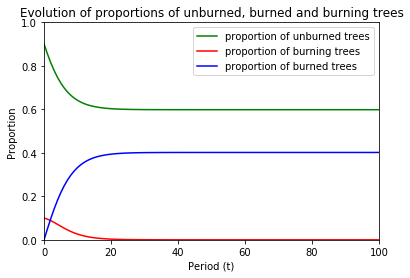

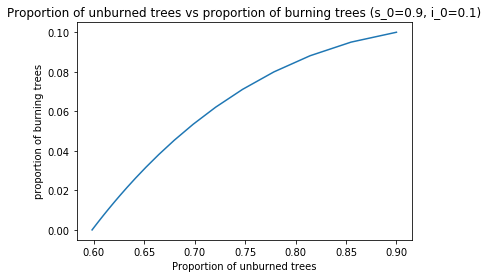

In [8]:
s_arr, i_arr, r_arr = simulation_one_round(f, q, s_0, i_0, 0)
show_timeplot(s_arr, i_arr, r_arr)
show_phaseplot(s_arr, i_arr, s_0, i_0)

Let's try to increase the $f$ and see what change will happen. Run the simulation with $s_0 = 0.9$, $i_0 = 0.1$, $f = 0.9$, and $q = 0.5$. 

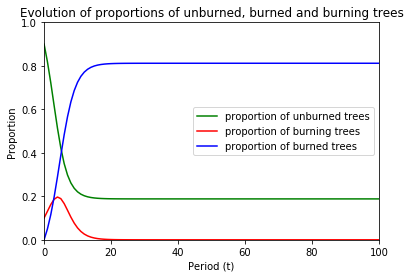

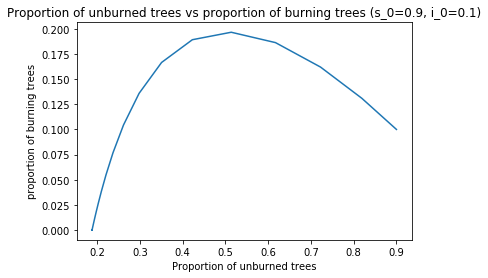

In [9]:
s_arr, i_arr, r_arr = simulation_one_round(0.9, 0.5, 0.9, 0.1, 0)
show_timeplot(s_arr, i_arr, r_arr)
show_phaseplot(s_arr, i_arr, 0.9, 0.1)

Run the simulation with $s_0 = 0.9$, $i_0 = 0.1$, $f = 1$, and $q = 0.5$. 

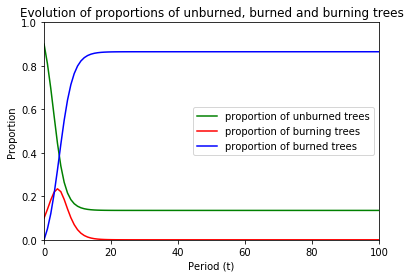

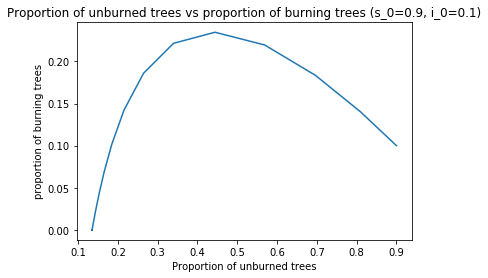

In [10]:
s_arr, i_arr, r_arr = simulation_one_round(1, 0.5, 0.9, 0.1, 0)
show_timeplot(s_arr, i_arr, r_arr)
show_phaseplot(s_arr, i_arr, 0.9, 0.1)

Then try to increase $i_0$ and then compare with dfault values.
Run the simulation with default $s_0 = 0.8$, $i_0 = 0.2$, $f = 0.5$ and $q = 0.5$. ($s_0 + i_0 = 1$)

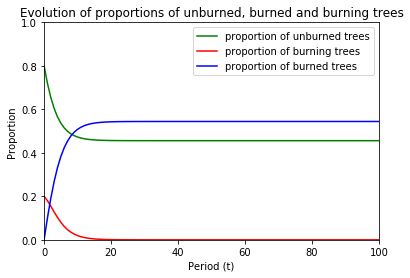

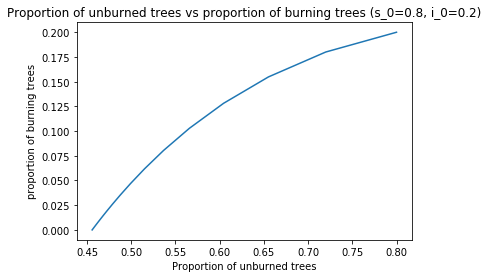

In [11]:
s_arr, i_arr, r_arr = simulation_one_round(0.5, 0.5, 0.8, 0.2,0)
show_timeplot( s_arr, i_arr, r_arr)
show_phaseplot(s_arr, i_arr, 0.8, 0.2)

Run the simulation with default $s_0 = 0.5$, $i_0 = 0.5$, $f = 0.5$ and $q = 0.5$. ($s_0 + i_0 = 1$)

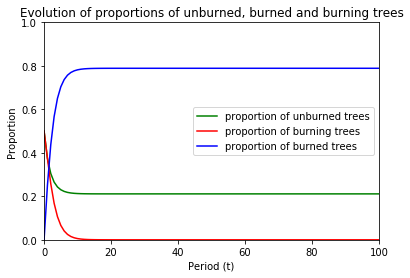

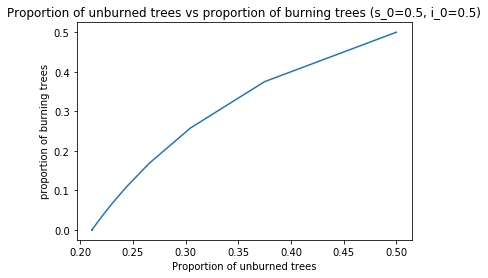

In [12]:
s_arr, i_arr, r_arr = simulation_one_round(0.5, 0.5, 0.5, 0.5, 0)
show_timeplot( s_arr, i_arr, r_arr)
show_phaseplot(s_arr, i_arr, 0.5, 0.5)

We can found that the relationship between the proportion of unburned trees and the proportion of burning trees looks similar when we just change the $s_0$ and $i_0$. But we can see that the relationship between the proportion of unburned trees and the proportion of burning trees changes when we change the $f$. It seems like the relationship between the proportion of unburned trees and the proportion of burning trees is dependent on $f$ and $q$. Therefore, for now, we just konw that when increasing the $f$, the fire will change from not spreading to spreading by looking and comparing the figures of "Proportion of unburned trees vs proportion of burning trees" with different $f$. When $q$, $s_0$ and $i_0$ are constant, the higher value of $f$ makes the proportion of burning trees increase firstly and then decrese and the rightmost point is the starting point which mean the fire spread firstly and then not spread. But the lower value of $f$ makes the proportion of burning trees always decrese which means fire not spread. However, there are still many possible combinations of $f$, $q$, $s_0$, and $i_0$ values which we do not experiment. Therefore, we will analyze these four variables more deeply later to figure out their relationship with spread of fire.

We already found that:
$
\begin{cases} 
\frac{di}{dt} = f * s * i - q * i,  & i(0) = i_0 \\
\frac{ds}{dt} = - f * s * i,  & s(0) = s_0 \\
\frac{dr}{dt} = q * i,  & r(0) = r_0
\end{cases}
$
$$$$
Combining these two differential equations, we can remove the $dt$ and get the following equation:
$$$$
$$\frac{di}{ds} = \frac{f * s * i - q * i}{- f * s * i}$$
$$\frac{dr}{ds} = \frac{q * i}{- f * s * i}$$
$$$$ 
Because $\lambda = \frac{f}{q}$, we can simplify the equation into:
$$$$
$
\begin{cases} 
\frac{di}{ds} = \frac{1}{\lambda * s} - 1 \\
i |_{s=s_0} = i_0 \\
\frac{di}{ds} = \frac{1}{-\lambda * s} \\
r |_{s=s_0} = r_0
\end{cases}
$
Therefore, we can get:
$$$$
$i(s) = (s_0 + i_0) - s + \frac{1}{\lambda} * ln(\frac{s}{s_0}) = 1 - s + \frac{1}{\lambda} * ln(\frac{s}{s_0})$ 
$$$$
($s_0 + i_0 = 1$ based on assuption 3)
$$r(s) = r_0 - \frac{1}{\lambda} * ln(\frac{s}{s_0})$$

In [13]:
def burn_unburn_change(s0, s,lamda):
    i = 1 - s + 1/lamda * np.log(s/s0)
    return i 

def burn_burned_change(s0,r0,s, lamda):
    r = r0 - 1/lamda * np.log(s/s0)
    return r

In order to research the relationship between the proportions of unburned trees and burning trees with $s_0$.

In [14]:
s0_arr = np.arange(1,6)/10
s_arr = np.arange(100)/100

Run the simulation with default $lamda = 5$.

/Users/robin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5,1,'Proportion of unburned trees vs proportion of burning trees with lamda = 5')

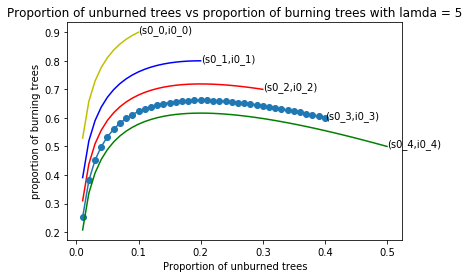

In [15]:
i_arr0 = []
i_arr1 = []
i_arr2 = []
i_arr3 = []
i_arr4 = []
s_arr0, s_arr1, s_arr2,  s_arr3,  s_arr4 = s_arr.copy(), s_arr.copy(), s_arr.copy(), s_arr.copy(), s_arr.copy()
s_arr0 = s_arr0[s_arr0 <= s0_arr[0]]
s_arr1 = s_arr1[s_arr1 <= s0_arr[1]]
s_arr2 = s_arr2[s_arr2 <= s0_arr[2]]
s_arr3 = s_arr3[s_arr3 <= s0_arr[3]]
s_arr4 = s_arr4[s_arr4 <= s0_arr[4]]
for i in range(len(s_arr0)):
    i_arr0.append(burn_unburn_change(s0_arr[0], s_arr0[i], 5))
for i in range(len(s_arr1)):
    i_arr1.append(burn_unburn_change(s0_arr[1], s_arr1[i], 5))
for i in range(len(s_arr2)):
    i_arr2.append(burn_unburn_change(s0_arr[2], s_arr2[i], 5))
for i in range(len(s_arr3)):
    i_arr3.append(burn_unburn_change(s0_arr[3], s_arr[i], 5))
for i in range(len(s_arr4)):
    i_arr4.append(burn_unburn_change(s0_arr[4], s_arr[i], 5))
plt.plot(s_arr0, i_arr0, "y-")
plt.plot(s_arr1, i_arr1, "b-")
plt.plot(s_arr2, i_arr2, "r-")
plt.plot(s_arr3, i_arr3, "o-")
plt.plot(s_arr4, i_arr4, "g-")
plt.text(s_arr0[-1],i_arr0[-1],'(s0_0,i0_0)')
plt.text(s_arr1[-1],i_arr1[-1],'(s0_1,i0_1)')
plt.text(s_arr2[-1],i_arr2[-1],'(s0_2,i0_2)')
plt.text(s_arr3[-1],i_arr3[-1],'(s0_3,i0_3)')
plt.text(s_arr4[-1],i_arr4[-1],'(s0_4,i0_4)')
plt.xlabel("Proportion of unburned trees")
plt.ylabel("proportion of burning trees")
plt.title("Proportion of unburned trees vs proportion of burning trees with lamda = 5")

## 2.6 Conclusion

From our experiment when $s_0 > \frac{1}{\lambda}$ . $i(t)$ will first increase then decrease to 0, it means the fire will be spread. If $s_0 \leq \frac{1}{\lambda}$, then it will decrease to 0 directly, which means the fire will not be spread. As a result, we can get the condition of the fire not spread is $s_0 \leq \frac{1}{\lambda}$. After we make the deep analysis of our ODE model, the model start to become similar with our Cellular Automata Model.